# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек

Выполнил студент гр. 9303 Максимов Евгений, вариант 10.

## Цель работы

Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.

## Основные теоретические положения

### Бинарный метод

Бинарный метод – алгоритм возведения числа $x$ в степень $n\in \mathbb{N}$, который основывается на двоичной записи показателя степени.

Необходимо перевести число $n$ в двоичную систему счисления и вычеркнуть крайний левый разряд. После этого проделывают операции с числом $y = x$ в соответствии со значениями разрядов $n_{i}$ слева направо.

$$ y :=
    \begin{cases}
        xy^2,   n_{i} = 1 \\
        y^2,   n_{i} = 0
    \end{cases}
$$

В результате получим, что $y = x^n$. Количество операции для данного метода оценивается следующим выражением. 
$$p = \lambda(n)+\nu(n)-1,$$ где $\lambda(n)=\lfloor lb(n) \rfloor$, $\nu(n)$ – количество единиц в двоичной записи числа $n$.

### Метод множителей

Метод множителей – другой алгоритм возведения числа $x$ в степень $n\in \mathbb{N}$, идея которого заключается в разложении показателя степени на множители.

Разложим показатель степени на множители $n = ij$, где $i$ – минимальный простой делитель числа $n$. После этого исходное число $x$ возводят в степень в соответствии с бинарным методом в степень $i$, а затем полученное число в степень $j$.

В результате получим, что $y = {(x^i)}^j = x^{ij} = x^n$. Количество операции для данного метода зависит от свойств исходного числа $n$ и оценивается следующим выражением.

$$ p =
    \begin{cases}
        \lambda(i)+\nu(i)+\lambda(j)+\nu(j)-2,   \text{ $n$ – составное;} \\
        \lambda(n-1)+\nu(n-1),   \text{ $n$ – простое.}
    \end{cases}
$$


### Аддитивные цепочки

Аддитивная цепочка для некоторого числа $n\in \mathbb{N}$ – последовательность натуральных чисел $\{a_i\}_{i=0}^m$, такая, что каждый следующий элемент равен сумме двух любых предыдущих (не обязательно различных).
$$a_{0}=1, \; a_{m}=n, \; a_{i}=a_{j}+a_{k}, \; k\leq j<i.$$

Длина аддитивной цепочки $l(n)$ – количество элементов в аддитивной цепочке.

Создание следующего элемента аддитивной цепочки с индеком $i$ называется шагом аддитивной цепочки. Бывают 3 видов, приведённых ниже.

1. Удвоение: $k=j=i-1$.
2. Звёздный шаг: $j=i-1, \; k \leq j$.
3. Малый шаг: $\lambda(a_{i}) = \lambda(a_{i-1})$.

Аддитивную цепочку называют звёздной, если она состоит только из элементов, образованных звёздными шагами. 

### Алгоритм Яо для вычисления приближённых аддитивных цепочек

Пусть заданы некоторые числа $n, k \geq 2$. Представим $n = \sum_{i=0}^{j}(a_j \cdot 2^{ik}), \; a_j\neq 0$.

Пусть функция  $d(z)$ – сумма чисел $2^{ik}$ для всех $i$ таких, что $a_i=z$.

Пусть $Y_k$ – аддитивная цепочка Яо. Начало цепочки содержит степени двойки от 1 по $\lambda(n)$. Затем вычисляются все значения $d(z)$, где $1 \leq z \leq 2^k-1$ и $d(z) \neq 0$. В результате получаем, что $n=\sum_{z=1}^{2^k-1} (z \cdot d(z))$.


### Вектор индексов

Пусть имеется звёздная цепочка $\{a_i\}_{i=1}^m,  a_1=1$. Тогда вектор индексов $\{r_i\}_{i=1}^{m-1},  r_i=\{x:1\leq x \leq i\}: a_i=a_{i-1}+a_{r_{i-1}}, 2 \leq i \leq m-1$

### Алгоритм дробления вектора индексов

Алгоритм дробления вектора индексов позволяет найти минимальную звёздную цепочку для $n \in \mathbb{N}$.

Пусть $\{r_i\}_{i=1}^q \cup {\{{\rho}_j \}}_{j=q+1}^m$ – вектор индексов, где ${\rho}_j= \{x: 1 \leq x \leq j \}$, ${\{r_i\}}_{i=1}^q$ – фиксированная часть, ${\{{\rho}_j\}}_{j=q+1}^m$ – изменяющаяся часть.

Наибольшее значение $a_{max}$ достигается при векторе индексов ${\{r_i\}}_{i=1}^{q} \cup \{q+1,q+2,\dots,m\}$; $a_{max} = a_{q+1} \cdot {2}^{m-q}$. Наименьшее значение $a_{min}$ достигается при векторе индексов ${\{r_i\}}_{i=1}^{q}\cup\{1,1,\dots,1\}$; $a_{min} = a_{q+1}+m-q$.

Пусть $\underline{l}(n)=\lceil lb(n) \rceil, \; \bar{l}(n)=\lambda(n)+\nu(n)-1$ – нижняя и верхняя граница длины аддитивной звёздной цепочки $l(n)$: $\underline{l}(n) \leq l(n) \leq \overline{l}(n)$.

Алгоритм состоит из шагов, приведённых ниже.

1. Рассматриваются аддитивные цепочки длины $m$ от значения $\underline{l}(n)$ до $\bar{l}(n)$, на каждой итерации выбираем $q \; (1 \leq q \leq m-1$).
2. Далее перебираем все возможные фиксированные части вектора индексов $\{r_i\}_{i=1}^q$, для каждой части строим соответствующую звездную цепочку, находим $a_{max}$ и ${a}_{min}$.

    1. Если $n \notin [a_{min},a_{max}]$, то переходим к следующему набору $\{r_i\}_{i=1}^q$;
    2. Если $n\in [a_{min},a_{max}]$, то перебираем все возможные изменяющиеся части вектора индексов ${\{{\rho}_j\}}_{j=q+1}^m$ и находим $a_m$:
    3. Если $n = a_{m}$, то искомая цепочка найдена;
    
4. Если все возможные изменяющиеся части вектора индексов ${\{{\rho}_j\}}_{j=q+1}^m$ исчерпаны, то переходим к следующему набору $\{r_i\}_{i=1}^q$.
5. Если все наборы вектора индексов длины $m$ исчерпаны, то увеличиваем $m$ на 1 и повторяем алгоритм для нового $m$.

### Теорема Брауэра

Пусть $k < lb(lb(2n))$. Тогда $l(n)<(1+k^{-1})\cdot \lceil lb(n) \rceil +2^{k-1}-k+2$.
При $k=\lambda(\lambda(n))-2\lambda(\lambda(\lambda(n)))$ следуют выражения, приведённые ниже.
1. $\lim \limits_{n \to \infty} \frac{l(n)}{\lambda(n)}=1$.
2. $l(n) < \lambda(n)(1+\frac{1}{\lambda(\lambda(n))}+\frac{o(\lambda(\lambda(\lambda(n))))}{\lambda(\lambda(n))^2})$; неравенство представляет собой наилучшую верхнюю оценку длины аддитивной цепочки $l(n)$.

### Гипотеза Шольца-Брауэра

Пусть $l^*(n)$ – длина звёздной цепочки. Тогда утверждается, что для любого $n \in \mathbb{N}$ верно выражение, приведённое ниже. $$l^*(2^n-1)\leq l^*(n)+n-1$$

## Постановка задачи

Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Порядок выполнения работы

1. Применить бинарный метод и метод множителей для $x^n$, где $n \geq 30$, для 2-3 значений $n$ (значения $n$ выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.
2. Реализовать алгоритм Брауэра (для нечётных вариантов) или алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра $k$, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.
3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при $n>500$. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.
4. Проверить следствие 1 теоремы Брауэра для $n=1..200$ путём построения функции $l(n)$ и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.
5. Проверить гипотезу Шольца–Брауэра для $1<n \leq 10$ на алгоритме дробления вектора индексов. Сделать выводы.

## Выполнение работы

### Бинарный метод и метод множителей

Исходный код для бинарного метода представлен в функции $binaryMethod(x, n, operationCount = 0)$.

Исходный код для метода множителей представлен в функции $multiplierMethod(x, n)$.

Результаты тестирования представлены ниже.

| $n$ | Число операций бинарного метода | Число операций метода множителей |
|:-:|:-:|:-:|
| 36 | 6 | 6 |
| 63 | 10 | 8 |
| 65 | 7 | 8 |

### Промежуточный вывод

В двух случаях использовались одни и те же входные данные, представленные в исходном коде ниже. Сравнительная эффективность двух методов зависит от входных данных: при $n = 2^k-1, k \in \mathbb{N}$ метод множителей оказывается эффективнее бинарного метода, однако при $n = 2^k+1, k \in \mathbb{N}$ бинарный метод эффективнее. В остальных случаях метод множителей оказывается не медленнее бинарного метода.

In [54]:
def binaryMethod(x, n, operationCount = 0):
    y = x;
    binaryString = bin(n)[3::];
    for i in binaryString:
        if(int(i)):
            y = y*y*x;
            operationCount += 2;
        else:
            y = y*y;
            operationCount += 1;
    return [y, operationCount];

def multiplierMethod(x, n):
    pMin = n;
    operationCount = 0;
    for i in range(2, n):
        if n%i == 0:
            pMin = i;
            break;
    multiplierPair = [pMin, n//pMin];
    y = x;
    subAnswer = binaryMethod(y, multiplierPair[0]);
    return binaryMethod(subAnswer[0], multiplierPair[1], subAnswer[1]);

x = 3;
nArray = [36, 63, 65];
for n in nArray:
    answer = binaryMethod(x, n);
    print("Результат для бинарного метода:\nx^n = {0}; количество операций: {1}.\n".format(answer[0], answer[1]));
for n in nArray:
    answer = multiplierMethod(x, n);
    print("Результат для метода множителей:\nx^n = {0}; количество операций: {1}.\n".format(answer[0], answer[1]));

Результат для бинарного метода:
x^n = 150094635296999121; количество операций: 6.

Результат для бинарного метода:
x^n = 1144561273430837494885949696427; количество операций: 10.

Результат для бинарного метода:
x^n = 10301051460877537453973547267843; количество операций: 7.

Результат для метода множителей:
x^n = 150094635296999121; количество операций: 6.

Результат для метода множителей:
x^n = 1144561273430837494885949696427; количество операций: 8.

Результат для метода множителей:
x^n = 10301051460877537453973547267843; количество операций: 8.



### Алгоритм Яо

Алгоритм Яо реализован в функции $yaoAlgorithm(n, k)$, которая использует функции $d(z, a, k)$ и $getBinaryVector(n)$.

Результаты тестирования представлены ниже.

| $n$ | Длина цепочки Яо | Длина кратчайшей АЦ |
|:-:|:-:|:-:|
| 35 | 8 | 7 |
| 40 | 8 | 7 |
| 55 | 12 | 9 |
| 61 | 11 | 7 |
| 76 | 9 | 9 |
| 81 | 9 | 9 |
| 95 | 12 | 10 |
| 107 | 11 | 10 |

### Промежуточный вывод

Алгоритм Яо находит и строит аддитивные цепочки, которые близки к минимальным, однако лишь в некоторых случаях они являются минимальными.

In [74]:
def d(z, a, k):
    answerSumm = 0;
    for i in range(0, len(a)):
        if z == a[i]:
            answerSumm += 2 ** (i*k)
    return answerSumm;


def getBinaryVector(n):
    binaryString = bin(n)[3::];
    n = 1;
    answerVector = [n];
    for i in binaryString:
        n *= 2;
        if(int(i)):
            answerVector.append(n);
            n += 1;
        answerVector.append(n);
    return answerVector;


def yaoAlgorithm(n, k):
    a = [];
    nIter = n;
    while nIter:
        a.append(nIter % (2 ** k));
        nIter //= (2 ** k);
    chainAnswer = set();
    for i in range(0, len(a)*k):
        chainAnswer.add(2 ** i);
    z = [];
    for i in range(1, 2**k):
        z.append(i);
    zNew = [];
    for zIter in z:
        if d(zIter, a, k) != 0:
            zNew.append(zIter);
    z = zNew;
    tmpValue = 0;
    for zIter in z:
        binaryVector = getBinaryVector(zIter);
        tmpValue += zIter * d(zIter, a, k);
        for j in binaryVector:
            chainAnswer.add(j*d(zIter, a, k));
        chainAnswer.add(tmpValue);
    chainAnswer = sorted(chainAnswer);
    while(chainAnswer[-1] != n):
        chainAnswer.pop();
    return chainAnswer;

n = [35, 40, 55, 61, 76, 81, 95, 107];
shortestLength = [7, 7, 9, 7, 9, 9, 10, 10];
k = [2, 2, 3, 3, 2, 3, 2, 3];
for i in range(len(n)):
    answer = yaoAlgorithm(n[i], k[i]);
    print("Результат для алгоритма Яо:\nЦепочка Яо: {0}; длина цепочки Яо: {1}; длина кратчайшей цепочки: {2}\n".format(answer, len(answer), shortestLength[i]));

Результат для алгоритма Яо:
Цепочка Яо: [1, 2, 3, 4, 8, 16, 32, 35]; длина цепочки Яо: 8; длина кратчайшей цепочки: 7

Результат для алгоритма Яо:
Цепочка Яо: [1, 2, 4, 8, 16, 20, 32, 40]; длина цепочки Яо: 8; длина кратчайшей цепочки: 7

Результат для алгоритма Яо:
Цепочка Яо: [1, 2, 3, 4, 6, 7, 8, 16, 24, 32, 48, 55]; длина цепочки Яо: 12; длина кратчайшей цепочки: 9

Результат для алгоритма Яо:
Цепочка Яо: [1, 2, 4, 5, 8, 16, 24, 32, 48, 56, 61]; длина цепочки Яо: 11; длина кратчайшей цепочки: 7

Результат для алгоритма Яо:
Цепочка Яо: [1, 2, 4, 8, 12, 16, 32, 64, 76]; длина цепочки Яо: 9; длина кратчайшей цепочки: 9

Результат для алгоритма Яо:
Цепочка Яо: [1, 2, 4, 8, 16, 32, 64, 65, 81]; длина цепочки Яо: 9; длина кратчайшей цепочки: 9

Результат для алгоритма Яо:
Цепочка Яо: [1, 2, 4, 5, 8, 10, 15, 16, 32, 64, 80, 95]; длина цепочки Яо: 12; длина кратчайшей цепочки: 10

Результат для алгоритма Яо:
Цепочка Яо: [1, 2, 3, 4, 8, 16, 32, 40, 64, 67, 107]; длина цепочки Яо: 11; длина 

### Алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки

Алгоритм дробления вектора индексов представлен в функции $splittingVector(n)$, которая использует библиотеку для измерения времени $time$ и вспомогательные функции $\nu(n), \; getChangingVector(m), \; getNextStaticVector(vector, q), \; getNextChangingVector(vector, q, m).$

Результаты тестирования представлены в таблице ниже.

| n | Звёздная цепочка | Длина ЗЦ | Минимальная АЦ | Время, с |
|:-:|:-:|:-:|:-:|:-:|
| 501 | [1, 2, 4, 8, 16, 32, 64, 96, 100, 200, 400, 500, 501] | 13 |13|2.39|
| 592 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 576, 592] | 12 |12|0.59|
| 683 | [1, 2, 4, 8, 16, 32, 64, 128, 136, 137, 273, 546, 683] | 13 |13|1.94|
| 774 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 258, 516, 774] | 12 |11|0.55|
| 865 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 288, 576, 864, 865] | 13 |13|1.67|
| 900 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 768, 896, 900] | 13 |12|1.67|
| 1001 | [1, 2, 4, 8, 16, 32, 64, 128, 192, 200, 400, 800, 1000, 1001] | 14 |14|16.93|

### Промежуточный вывод

Алгоритм дробления вектора индексов работает значительно дольше, чем алгоритмы, представленные выше, однако он достаточно точно вычисляет минимальную аддитивную цепочку (лишь для теста $n = 900$ алгоритм допустил ошибку).

In [93]:
import time

def v(n):
    return 1 if n == 1 else v(n//2) + n%2;

def getChangingVector(m):
    vector = [];
    for i in range(1, m):
        vector.append(i);
    return vector;

def getNextStaticVector(vector, q):
    for i in range(q, 1, -1):
        if vector[i-1] > 1:
            vector[i-1] -= 1;
            break
        if(vector[i-1] == 1):
            vector[i-1] = i;
    return vector;

def getNextChangingVector(vector, q, m):
    for i in range(m, q, -1):
        if vector[i-1] > 1:
            vector[i-1] -= 1;
            break;
        if(vector[i-1] == 1):
            vector[i-1] = i;
    return vector;

def splittingVector(n):
    lowestL = n.bit_length();
    highestL = lowestL+v(n)-1;
    isEndFlag = False;
    for m in range(lowestL, highestL+1):
        indexVector = getChangingVector(m);
        q = m//2-1;
        while True:
            addChain = [];
            addChain.append(1);
            for i in indexVector:
                addChain.append(addChain[-1]+addChain[i-1]);
            if addChain[m-1] == n:
                isEndFlag = True;
                break
            aMin = addChain[q]+m-q;
            aMax = addChain[q]*2**(m-q);
            if n in range(aMin, aMax+1):
                indexVector = getNextChangingVector(indexVector, q, m-1);
                if indexVector[q:] == [1 for x in range((m-q-1))]:
                    break;
            else:
                indexVector = getNextStaticVector(indexVector, q);
                if indexVector[:q] == [1 for x in range(q)]:
                    break
        if isEndFlag:
            return indexVector, addChain;
    return indexVector, addChain;

nArray = [501, 592, 683, 774, 865, 900, 1001];
for n in nArray:
    startTime = time.time();
    indexVector, addChain = splittingVector(n);
    endTime = time.time();
    print("Время: {0} с;\nвектор индексов: {1};\nаддитивная цепочка: {2}.\n ".format(endTime-startTime, indexVector, addChain));

Время: 2.3949317932128906 с;
вектор индексов: [1, 2, 3, 4, 5, 6, 6, 3, 9, 10, 9, 1];
аддитивная цепочка: [1, 2, 4, 8, 16, 32, 64, 96, 100, 200, 400, 500, 501].
 
Время: 0.5897879600524902 с;
вектор индексов: [1, 2, 3, 4, 5, 6, 7, 8, 9, 7, 5];
аддитивная цепочка: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 576, 592].
 
Время: 1.9365227222442627 с;
вектор индексов: [1, 2, 3, 4, 5, 6, 7, 4, 1, 9, 11, 10];
аддитивная цепочка: [1, 2, 4, 8, 16, 32, 64, 128, 136, 137, 273, 546, 683].
 
Время: 0.5507550239562988 с;
вектор индексов: [1, 2, 3, 4, 5, 6, 7, 8, 2, 10, 10];
аддитивная цепочка: [1, 2, 4, 8, 16, 32, 64, 128, 256, 258, 516, 774].
 
Время: 1.6658508777618408 с;
вектор индексов: [1, 2, 3, 4, 5, 6, 7, 8, 6, 10, 10, 1];
аддитивная цепочка: [1, 2, 4, 8, 16, 32, 64, 128, 256, 288, 576, 864, 865].
 
Время: 1.671940803527832 с;
вектор индексов: [1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 8, 3];
аддитивная цепочка: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 768, 896, 900].
 
Время: 16.93447470664978 с;
вектор инде

### Проверка следствия №1 теоремы Брауэра

Построим график функции $l(n)$ по точкам от $1 \leq n \leq 200$. Исходный код для построения графика и сам график представлены ниже.

Затем построим аппроксимирующую кривую по уже построенным точкам. Она подобна графику функции $\lambda(n)$, которая соответствует графику логарифма. 

### Промежуточный вывод

Полученное изображение подтверждает следствие из теоремы Брауэра.

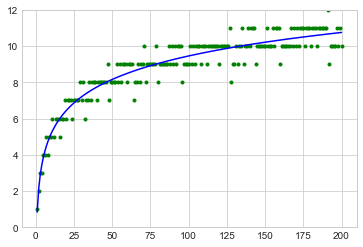

In [134]:
%matplotlib inline
import matplotlib.pyplot as plt
from math import log

N = 200;
x = range(1, N+1);
y1 = [];

for i in x:
    indexVector, addChain = splittingVector(i);
    y1.append(len(addChain));

sumX = sum(list(map(lambda i: log(i, 2), x)));
sumY = sum(y1);
sumXY = sum(list(map(lambda i: log(i, 2)*y1[i-1], x)));
sumX2 = sum(list(map(lambda i: log(i, 2)**2, x)));
a = (N*sumXY - sumX*sumY)/(N*sumX2 - sumX**2);
b = (sumY - a*sumX)/N;
y2 = list(map(lambda i: a*log(i, 2) + b, x));

plt.plot(x, y1, '.', color='green');
plt.plot(x, y2, color='blue');
plt.ylim(0, 12);

### Гипотеза Шольца-Брауэра

Проверим на практике гипотезу Шольца–Брауэра. Применим алгоритм дробления вектора индексов для $2 \leq n \leq 10$. Полученные результаты представлены в таблице ниже.

| $n$ | $l^*(n)$ | $l^*(n)+n-1$ | $2^n-1$ | $l^*(2^n-1)$ |
|:-:|:-:|:-:|:-:|:-:|
| 2 | 2 | 3 |3| 3 |
| 3 | 3 | 5 |7| 5 |
| 4 | 3 | 6 |15| 6 |
| 5 | 4 | 8 |31| 8 |
| 6 | 4 | 9 |63| 9 |
| 7 | 5 | 11 |127| 11 |
| 8 | 4 | 11 |255| 11 |
| 9 | 5 | 13 |511| 13 |
| 10 | 5 | 14 |1023| 14 |

### Промежуточный вывод

На примере небольшого числа значений $n$ была подтверждена гипотеза Шольца-Брауэра для $n \leq 10$.

## Вывод

В ходе практической работы были получены базовые навыки работы с системой компьютерной алгебры SageMath. В ходе практической работы были рассмотрены такие понятия, как аддитивная цепочка, вектор индексов; были исследованы способы возведения в степень натуральных чисел (бинарный и метод множителей), способы построения аддитивных цепочек (алгоритм Яо и алгоритм дробления векторов индексов).

В результате практической работы было графически доказано следствие теоремы Брауэра и была проверена гипотеза Шольца-Брауэра на небольшом наборе входных данных. Результатом практической работы также является исполняемый исходный код, который реализует следующие алгоритмы и методы: бинарный метод, метод множителей, алгоритм Яо, алгоритм дробления векторов индексов.